In [54]:
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.ndimage import gaussian_filter1d
import json
import numpy as np
%matplotlib inline

In [55]:
positions = json.load(open('posns.json'))


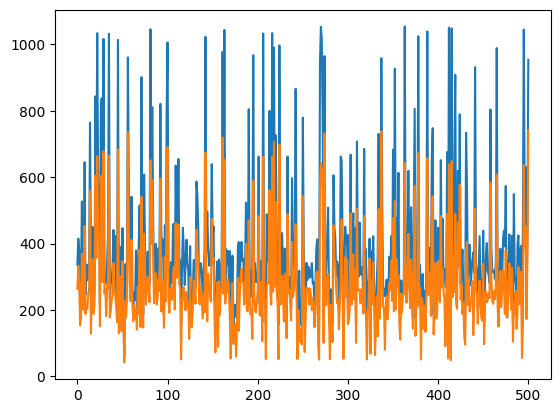

In [56]:
xs = [p['x'] for p in positions]
rhxs = [p['x'] + p['width'] for p in positions]
plt.plot(rhxs)

plt.plot(xs)

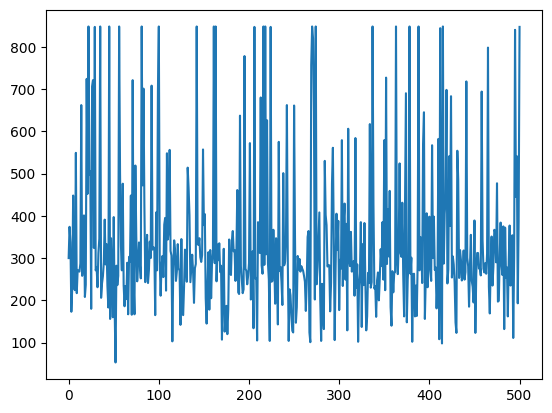

In [57]:
cms = [(2 * p['x'] + p['width']) / 2 for p in positions]
plt.plot(cms)

In [58]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='same')

[ 41  73 108 137 161 196 231 262 298 345 374 397 432]


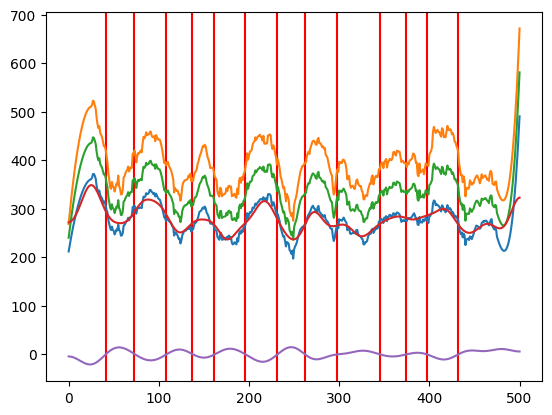

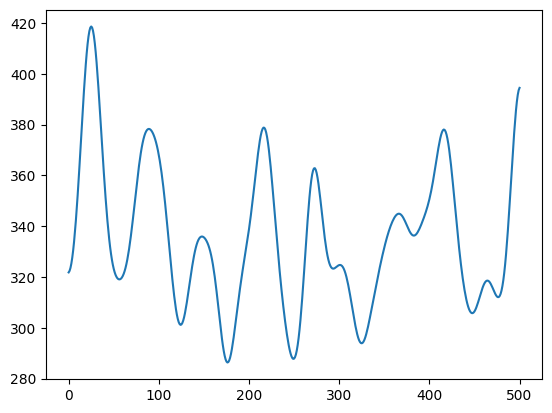

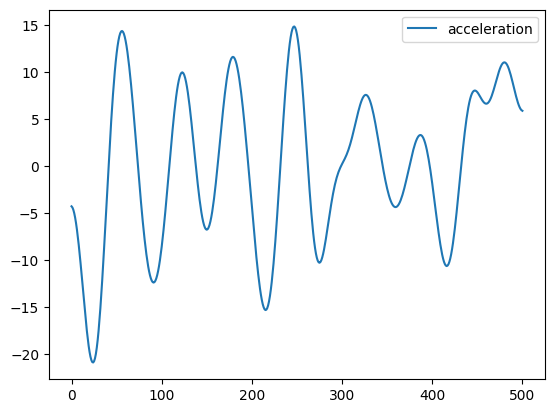

In [71]:

window = 51 
order = 3

def smooth_skier_position(position_data, method='savgol', **kwargs):
    if method == 'savgol':
        window = kwargs.get('window', 51)
        order = kwargs.get('order', 3)
        return savgol_filter(position_data, window, order)

    if method == 'ma':
        return moving_average(position_data, kwargs.get('window', 25))

    if method == 'gaussian':
        return gaussian_filter1d(position_data, kwargs.get('sigma', 10))

sigma = 10

smoothed_cm = smooth_skier_position(cms, method='gaussian')

velocity = gaussian_filter1d(np.gradient(smoothed_cm), sigma)
acceleration = gaussian_filter1d(np.gradient(velocity), sigma) * 100


# inflection_points = []
# for i in range(1, len(acceleration_smoothed)):
#     # If the sign changes, we have a zero crossing
#     if acceleration_smoothed[i-1] * acceleration_smoothed[i] <= 0:
#         # Linear interpolation to find the exact crossing point
#         if acceleration_smoothed[i-1] != acceleration_smoothed[i]:  # Avoid division by zero
#             t = -acceleration_smoothed[i-1] / (acceleration_smoothed[i] - acceleration_smoothed[i-1])
#             idx = i-1 + t
#         else:
#             idx = i-1
#         inflection_points.append(int(idx))

# plt.plot(xs)
# plt.plot(velocity, label='velocity')
zero_crossings = np.where(np.diff(np.signbit(acceleration)))[0]

print(zero_crossings)
for c in zero_crossings:
    plt.axvline(x=c, color='r')

# for i in inflection_points:
#     plt.axvline(x=i, color='r')
plt.plot(smooth_skier_position(xs, window=window, order=order))
plt.plot(smooth_skier_position(rhxs, window=window, order=order))
plt.plot(smooth_skier_position(cms, window=window, order=order))
plt.plot(smooth_skier_position(xs, method='gaussian'))
plt.plot(acceleration)

plt.show()
plt.plot(smooth_skier_position(cms, method='gaussian'))
plt.show()


plt.plot(acceleration, label='acceleration')
plt.legend()
plt.show()